Terravic original: http://vcipl-okstate.org/pbvs/bench/Data/04/download.html <br>
Link Google Drive: https://drive.google.com/drive/folders/1HhNXDqfuXckBl8EOBi_NEJcyNIVKIcdp?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importaciones
import random, os, shutil
import imageio
import cv2
import numpy as np
import PIL

# **Descomprimimos la base de datos (unzip)**

In [3]:
from zipfile import ZipFile
cont = 0
for cont in range(1,21): #cont = 1
  if cont < 10 and cont != 5 and cont != 6:
    file_name = '/content/drive/My Drive/Terravic_Facial_IR_Database/face0{}.zip'.format(cont)
  elif cont >= 10:
    file_name = '/content/drive/My Drive/Terravic_Facial_IR_Database/face{}.zip'.format(cont)
  with ZipFile(file_name, 'r') as zip: 
    zip.extractall('Terravic_Original') 

# **Renombramos las clases de la base de datos**

Esta operación es importante para poder manejar con mayor facilidad los nombres de las carpetas que contienen las imágenes de cada individuo, ya que se debe considerar que las colecciones 5 y 6 están dañadas y no es posible acceder a ellas.

In [4]:
import os

for i in range(1,21):
  if i >= 7 and i <= 9:
    os.rename('Terravic_Original/face0{}'.format(i), 'Terravic_Original/face0{}'.format(i - 2))
  elif i >= 10 and i <= 11:
    os.rename('Terravic_Original/face{}'.format(i), 'Terravic_Original/face0{}'.format(i - 2))
  elif i >= 12:
    os.rename('Terravic_Original/face{}'.format(i), 'Terravic_Original/face{}'.format(i - 2))

# **Construcción de los conjuntos de entrenamiento, validación y prueba**

**Ordenamos la base de datos aleatoriamente**

In [5]:
os.mkdir('Terravic_Shuffled')

In [6]:
#Creación de carpetas
for i in range(1,19):
  if i < 10: #i = 0
    dest_train = 'Terravic_Shuffled/face0{}/'.format(i) # dest_train = 'Terravic_Shuffled/face01/'
  elif i >= 10:
    dest_train = 'Terravic_Shuffled/face{}/'.format(i)
  os.mkdir(dest_train)


for index_class in range(1,19): #index_class = 1
  sample = 0
  if index_class < 10: 
    class_path = 'Terravic_Original/face0{}/'.format(index_class) #class_path = 'Terravic_Original/face01/'
  elif index_class >= 10:
    class_path = 'Terravic_Original/face{}/'.format(index_class)

  #Extracción de las imágenes correspondientes a cada individuo
  lst = sorted(os.listdir(class_path))

  #Shuffling the dataset
  random.shuffle(lst)

  for file_name in lst:
    img_person = imageio.imread(class_path + file_name)
    if index_class < 10:
      if sample < 10:                                                       #0000.jpg
        imageio.imwrite('Terravic_Shuffled/face0{}/'.format(index_class) + '000{}.jpg'.format(sample), img_person)
      elif sample >= 10 and sample < 100:
        imageio.imwrite('Terravic_Shuffled/face0{}/'.format(index_class) + '00{}.jpg'.format(sample), img_person)
      elif sample >= 100 and sample < 1000:
        imageio.imwrite('Terravic_Shuffled/face0{}/'.format(index_class) + '0{}.jpg'.format(sample), img_person)
      else:
        imageio.imwrite('Terravic_Shuffled/face0{}/'.format(index_class) + '{}.jpg'.format(sample), img_person)
      
      sample = sample + 1

    else:
      if sample < 10:
        imageio.imwrite('Terravic_Shuffled/face{}/'.format(index_class) + '000{}.jpg'.format(sample), img_person)
      elif sample >= 10 and sample < 100:
        imageio.imwrite('Terravic_Shuffled/face{}/'.format(index_class) + '00{}.jpg'.format(sample), img_person)
      elif sample >= 100 and sample < 1000:
        imageio.imwrite('Terravic_Shuffled/face{}/'.format(index_class) + '0{}.jpg'.format(sample), img_person)
      else:
        imageio.imwrite('Terravic_Shuffled/face{}/'.format(index_class) + '{}.jpg'.format(sample), img_person)
      
      sample = sample + 1

In [7]:
#Comprobación
import os
for i in range(1,19):
  if i < 10:
    print('total  images in test_original/face0{}:'.format(i), len(os.listdir('Terravic_Shuffled/face0{}/'.format(i))))
  else:
    print('total  images in test_original/face{}:'.format(i), len(os.listdir('Terravic_Shuffled/face{}/'.format(i))))

total  images in test_original/face01: 227
total  images in test_original/face02: 620
total  images in test_original/face03: 592
total  images in test_original/face04: 487
total  images in test_original/face05: 1297
total  images in test_original/face06: 857
total  images in test_original/face07: 1117
total  images in test_original/face08: 283
total  images in test_original/face09: 434
total  images in test_original/face10: 2179
total  images in test_original/face11: 1417
total  images in test_original/face12: 1482
total  images in test_original/face13: 1125
total  images in test_original/face14: 1611
total  images in test_original/face15: 2632
total  images in test_original/face16: 2215
total  images in test_original/face17: 2539
total  images in test_original/face18: 1670


**Creación de las carpetas de entrenamiento, validación y prueba, con sus respectivas carpetas para cada individuo**

In [8]:
datasets = ['train', 'validation', 'test']

for dataset_name in datasets:
  os.mkdir(dataset_name)
  for i in range(1,19):
    if i < 10:
      dest_train = dataset_name+'/face0{}/'.format(i) #dest_train = 'train/face02/
    elif i >= 10:
      dest_train = dataset_name+'/face{}/'.format(i)
    os.mkdir(dest_train)

In [10]:
def fill_dataset(src_dataset, dest_dataset, face_index, limit_low, limit_upper): 
#fill_dataset('Terravic_Shuffled','test', 1, limit_validation + 127, limit_validation + limit_test + 127) 
  if face_index < 10:
    src_path = src_dataset+'/face0{}/'.format(face_index)
    dest_path = dest_dataset+'/face0{}/'.format(face_index)
  else:
    src_path = src_dataset+'/face{}/'.format(face_index)
    dest_path = dest_dataset+'/face{}/'.format(face_index)

  lst = sorted(os.listdir(src_path))
        
  for file_name in lst[limit_low:limit_upper]: #lst[177,227]
    if limit_low < limit_upper:
      img_original = imageio.imread(src_path + file_name)
      if limit_low < 10:
          imageio.imwrite(dest_path + '000{}.jpg'.format(limit_low), img_original)
      elif limit_low >= 10 and limit_low < 100:
          imageio.imwrite(dest_path + '00{}.jpg'.format(limit_low), img_original)
      else: 
          imageio.imwrite(dest_path + '0{}.jpg'.format(limit_low), img_original)
              
      limit_low = limit_low + 1

**Asignación de imágenes a cada conjunto**

In [ ]:
for i in range (1, 19):
  if i < 10:
    total = len(os.listdir('Terravic_Shuffled/face0{}'.format(i))) # person01 tiene 227, total = 227
  else:
    total = len(os.listdir('Terravic_Shuffled/face{}'.format(i)))
  limit1 = total - 127 # limit1 = 1482 - 127 = 1355
  if limit1 % 2 == 0:
    limit_validation = int(limit1 / 2) #limit_validation = 50
    limit_test = limit_validation ##limit_test = 50
  else:
    limit_validation = limit1 // 2 #-> limit_validation = 677
    limit_test = (limit1 // 2) + 1 #-> limit_test = 678

  fill_dataset('Terravic_Shuffled','train', i, 0, 127)
  print(limit_validation + 127)
  fill_dataset('Terravic_Shuffled','validation', i, 127, limit_validation + 127) 
  fill_dataset('Terravic_Shuffled','test', i, limit_validation + 127, limit_validation + limit_test + 127)

177
373
359
307
712
492
622
205
280
1153
772
804
626
869
1379
1171
1333
898


In [11]:
#Face 1 (train, validation and test sets)
fill_dataset('Terravic_Shuffled','train', 1, 0, 127)
fill_dataset('Terravic_Shuffled','validation', 1, 127, 177)
fill_dataset('Terravic_Shuffled','test', 1, 177, 227)

#Face 2 (train and validation sets)
fill_dataset('Terravic_Shuffled','train', 2, 0, 127)
fill_dataset('Terravic_Shuffled','validation', 2, 127, 374)
fill_dataset('Terravic_Shuffled','test', 2, 374, 620)

#Face 3 (train and validation sets)
fill_dataset('Terravic_Shuffled','train', 3, 0, 127)
fill_dataset('Terravic_Shuffled','validation', 3, 127, 360)
fill_dataset('Terravic_Shuffled','test', 3, 360, 592)

#Face 4 (train and validation sets)
fill_dataset('Terravic_Shuffled','train', 4, 0, 127)
fill_dataset('Terravic_Shuffled','validation', 4, 127, 307)
fill_dataset('Terravic_Shuffled','test', 4, 307, 487)

#Face 5 (train and validation sets)
fill_dataset('Terravic_Shuffled','train', 5, 0, 127)
fill_dataset('Terravic_Shuffled','validation', 5, 127, 712)
fill_dataset('Terravic_Shuffled','test', 5, 712, 1297)

#Face 6 (train and validation sets)
fill_dataset('Terravic_Shuffled','train', 6, 0, 127)
fill_dataset('Terravic_Shuffled','validation', 6, 127, 492)
fill_dataset('Terravic_Shuffled','test', 6, 492, 857)

#Face 7 (train and validation sets)
fill_dataset('Terravic_Shuffled','train', 7, 0, 127)
fill_dataset('Terravic_Shuffled','validation', 7, 127, 622)
fill_dataset('Terravic_Shuffled','test', 7, 622, 1117)

#Face 8 (train and validation sets)
fill_dataset('Terravic_Shuffled','train', 8, 0, 127)
fill_dataset('Terravic_Shuffled','validation', 8, 127, 205)
fill_dataset('Terravic_Shuffled','test', 8, 205, 283)

#Face 9 (train and validation sets)
fill_dataset('Terravic_Shuffled','train', 9, 0, 127)
fill_dataset('Terravic_Shuffled','validation', 9, 127, 281)
fill_dataset('Terravic_Shuffled','test', 9, 281, 434)

#Face 10 (train and validation sets)
fill_dataset('Terravic_Shuffled','train', 10, 0, 127)
fill_dataset('Terravic_Shuffled','validation', 10, 127, 1153)
fill_dataset('Terravic_Shuffled','test', 10, 1153, 2179)

#Face 11 (train and validation sets)
fill_dataset('Terravic_Shuffled','train', 11, 0, 127)
fill_dataset('Terravic_Shuffled','validation', 11, 127, 772)
fill_dataset('Terravic_Shuffled','test', 11, 772, 1417)

#Face 12 (train and validation sets)
fill_dataset('Terravic_Shuffled','train', 12, 0, 127)
fill_dataset('Terravic_Shuffled','validation', 12, 127, 805)
fill_dataset('Terravic_Shuffled','test', 12, 805, 1482)

#Face 13 (train and validation sets)
fill_dataset('Terravic_Shuffled','train', 13, 0, 127)
fill_dataset('Terravic_Shuffled','validation', 13, 127, 626)
fill_dataset('Terravic_Shuffled','test', 13, 626, 1125)

#Face 14 (train and validation sets)
fill_dataset('Terravic_Shuffled','train', 14, 0, 127)
fill_dataset('Terravic_Shuffled','validation', 14, 127, 869)
fill_dataset('Terravic_Shuffled','test', 14, 869, 1611)

#Face 15 (train and validation sets)
fill_dataset('Terravic_Shuffled','train', 15, 0, 127)
fill_dataset('Terravic_Shuffled','validation', 15, 127, 1380)
fill_dataset('Terravic_Shuffled','test', 15, 1380, 2632)

#Face 16 (train and validation sets)
fill_dataset('Terravic_Shuffled','train', 16, 0, 127)
fill_dataset('Terravic_Shuffled','validation', 16, 127, 1171)
fill_dataset('Terravic_Shuffled','test', 16, 1171, 2215)

#Face 17 (train and validation sets)
fill_dataset('Terravic_Shuffled','train', 17, 0, 127)
fill_dataset('Terravic_Shuffled','validation', 17, 127, 1333)
fill_dataset('Terravic_Shuffled','test', 17, 1333, 2539)

#Face 18 (train and validation sets)
fill_dataset('Terravic_Shuffled','train', 18, 0, 127)
fill_dataset('Terravic_Shuffled','validation', 18, 127, 899)
fill_dataset('Terravic_Shuffled','test', 18, 899, 1670)

In [12]:
#Comprobación
import os
for i in range(1, 19):
  if i < 10:
    print('total  images in train/face0{}:'.format(i), len(os.listdir('train/face0{}/'.format(i))))
    print('total  images in validation/face0{}:'.format(i), len(os.listdir('validation/face0{}/'.format(i))))
    print('total  images in test/face0{}:'.format(i), len(os.listdir('test/face0{}/'.format(i))))
  else:
    print('total  images in train/face{}:'.format(i), len(os.listdir('train/face{}/'.format(i))))
    print('total  images in validation/face{}:'.format(i), len(os.listdir('validation/face{}/'.format(i))))
    print('total  images in test/face{}:'.format(i), len(os.listdir('test/face{}/'.format(i))))

total  images in train/face01: 127
total  images in validation/face01: 50
total  images in test/face01: 50
total  images in train/face02: 127
total  images in validation/face02: 247
total  images in test/face02: 246
total  images in train/face03: 127
total  images in validation/face03: 233
total  images in test/face03: 232
total  images in train/face04: 127
total  images in validation/face04: 180
total  images in test/face04: 180
total  images in train/face05: 127
total  images in validation/face05: 585
total  images in test/face05: 585
total  images in train/face06: 127
total  images in validation/face06: 365
total  images in test/face06: 365
total  images in train/face07: 127
total  images in validation/face07: 495
total  images in test/face07: 495
total  images in train/face08: 127
total  images in validation/face08: 78
total  images in test/face08: 78
total  images in train/face09: 127
total  images in validation/face09: 154
total  images in test/face09: 153
total  images in train/

# **Sistema de reconocimiento facial**

**Referenciamos los conjuntos de entrenamiento, validación y prueba**

In [13]:
train_dir = os.path.join('train')
validation_dir = os.path.join('validation')
test_dir = os.path.join('test')

**Carga de la arquitectura VGG16**

In [14]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(72, 96, 3)) # input_shape = (largo, ancho, canales)

conv_base.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 72, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 72, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 72, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 36, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 36, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 36, 48, 128)       147584    
______________________________________________________________

**Congelamos y descongelamos ciertas capas (Fine-tuning)**

In [15]:
for layer in conv_base.layers:
    if layer.name[:6] == 'block5': 
      layer.trainable = True
    else:
      layer.trainable = False

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 72, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 72, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 72, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 36, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 36, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 36, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 24, 128)       0     

# **Definición de la arquitectura (incluyendo el módulo de transfer learning)**

In [20]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(conv_base)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization()) #Normalizar los pesos aprendidos hasta este punto
model.add(layers.Flatten())
model.add(layers.Dense(18, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 3, 512)         14714688  
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 512)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 1, 512)         2048      
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 18)                9234      
Total params: 14,725,970
Trainable params: 7,089,682
Non-trainable params: 7,636,288
_________________________________________________________________


# **Compilación**

In [21]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc']) #'acc' -> accuracy -> precisión

# **Definición de los generadores**

In [22]:
#Using ImageDataGenerator to read images from directories
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # Target directory
        target_size=(72, 96), # All images are resized from 240x320 to 72x96
        batch_size= 9, 
        color_mode='rgb',
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(72, 96),
        batch_size=1,
        color_mode='rgb',
        class_mode='categorical')

Found 2286 images belonging to 18 classes.
Found 10252 images belonging to 18 classes.


# **Entrenamiento**

In [23]:
#Training and validation stages
history = model.fit(
      train_generator,
      steps_per_epoch=254, #70
      epochs= 10,
      validation_data=validation_generator,
      validation_steps=10252)

Epoch 1/10
254/254 [==============================] - 58s 229ms/step - loss: 0.0776 - acc: 0.9847 - val_loss: 4.2827e-04 - val_acc: 1.0000
Epoch 2/10
254/254 [==============================] - 58s 228ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 3/10
254/254 [==============================] - 58s 227ms/step - loss: 5.1276e-05 - acc: 1.0000 - val_loss: 5.8622e-06 - val_acc: 1.0000
Epoch 4/10
254/254 [==============================] - 58s 227ms/step - loss: 1.6254e-04 - acc: 1.0000 - val_loss: 2.5424e-06 - val_acc: 1.0000
Epoch 5/10
252/254 [============================>.] - ETA: 0s - loss: 5.1764e-05 - acc: 1.0000

KeyboardInterrupt: ignored

# **Curvas de precisión y pérdida**

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
max_val_acc = max(val_acc)
max_val_acc_epoch= val_acc.index(max(val_acc)) + 1
loss = history.history['loss']
val_loss = history.history['val_loss']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Precisión en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Precisión en la validación')
plt.plot(max_val_acc_epoch, max_val_acc, 'bo', label='Maximum accuracy')
plt.title('Precisión durante el entrenamiento y la validación')
plt.legend()
print("Best accuracy epoch : % d, Value : % .1f" %(max_val_acc_epoch, max_val_acc)) 
plt.figure()

plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.plot(min_val_loss_epoch, min_val_loss, 'bo', label='Minimum loss')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
print("Best loss epoch : % d, Value : % .10f" %(min_val_loss_epoch, min_val_loss))

plt.show()

NameError: ignored

# **Re-entrenamiento del modelo**

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(conv_base)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(18, activation='softmax'))

from keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
#Training and validation stages
history = model.fit(
      train_generator,
      steps_per_epoch=254, #70
      epochs= 3)

Epoch 1/3
254/254 [==============================] - 5s 21ms/step - loss: 0.0568 - acc: 0.9891
Epoch 2/3
254/254 [==============================] - 5s 21ms/step - loss: 4.2741e-05 - acc: 1.0000
Epoch 3/3
254/254 [==============================] - 5s 21ms/step - loss: 1.8280e-05 - acc: 1.0000


In [ ]:
#Guardamos el modelo
model.save('/content/drive/My Drive/Terravic_Facial_IR_Database/face_recognition_model1.h5')

In [ ]:
#Cargamos el modelo
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/My Drive/Terravic_Facial_IR_Database/face_recognition_model1.h5', compile=False)

# **Evaluación del modelo final**

In [ ]:
#Test stage
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(72, 96),
        batch_size=1,
        color_mode='rgb',
        class_mode='categorical')

Found 10246 images belonging to 18 classes.


In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=10252)
print('Recognition rate: ', test_acc)

10246/10252 [============================>.] - 53s 5ms/step - loss: 4.9609e-07 - acc: 1.0000
Recognition rate:  1.0


In [ ]:
print('Recognition rate: ', test_loss)

Recognition rate:  4.960852493240964e-07


# **Predicciones**

**Particular**

In [ ]:
from PIL import Image

width = 96
height = 72
image_face = Image.open('test/face17/01349.jpg')
image_face = image_face.resize((width, height), Image.ANTIALIAS)
image_face = np.array(image_face) #La imagen se convierte en un arreglo
image_face = image_face / 255.0

In [ ]:
image_face = np.expand_dims(image_face, axis = 0)
image_face = np.expand_dims(image_face, axis = -1) # image_face: (1, 72, 96, 1) #Tensor
image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3) # image_face: (1, 72, 96, 3)
print(image_face.shape)
prediction = model.predict(image_face)
print('La imagen pertenece a la persona', np.argmax(prediction)+1)

(1, 72, 96, 3)
La imagen pertenece a la persona 17


**General**

In [ ]:
predictions = []
labels = []
for individual in range(1,19):
  if (individual) < 10:
    person = 'face0{}/'.format(individual)
  elif (individual) >= 10:
    person = 'face{}/'.format(individual)
  for index in range(len(os.listdir('train/'+person)) + len(os.listdir('validation/'+person)), len(os.listdir('train/'+person)) + len(os.listdir('validation/'+person)) + len(os.listdir('test/'+person))):
    width = 96
    height = 72
    if index < 100:
      image_face = Image.open('test/'+person+'00{}.jpg'.format(index))
    else:
      image_face = Image.open('test/'+person+'0{}.jpg'.format(index))
    image_face = image_face.resize((width, height), Image.ANTIALIAS)
    image_face = np.array(image_face)
    image_face = image_face / 255.0
    image_face = np.expand_dims(image_face, axis = 0)
    image_face = np.expand_dims(image_face, axis = -1)
    image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3)
    prediction = model.predict(image_face)
    predictions.append(np.argmax(prediction)+1)
    labels.append(individual)

KeyboardInterrupt: ignored

In [ ]:
predictions = []
labels = []
for individual in range(1,19):
  if (individual) < 10:
    face = 'face0{}/'.format(individual)
  elif (individual) >= 10:
    face = 'face{}/'.format(individual)
  for index in range(len(os.listdir('train/'+face)) + len(os.listdir('validation/'+face)), len(os.listdir('train/'+face)) + len(os.listdir('validation/'+face)) + len(os.listdir('test/'+face))):
    width = 96
    height = 72
    if index < 100:
      image_face = Image.open('test/'+face+'00{}.jpg'.format(index))
    else:
      image_face = Image.open('test/'+face+'0{}.jpg'.format(index))
    image_face = image_face.resize((width, height), Image.ANTIALIAS)
    image_face = np.array(image_face)
    image_face = image_face / 255.0
    image_face = np.expand_dims(image_face, axis = 0)
    image_face = np.expand_dims(image_face, axis = -1)
    image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3)
    prediction = model.predict(image_face)
    predictions.append(np.argmax(prediction)+1)
    labels.append(individual)

# **Evaluación del desempeño mediante matriz de confusión y F1**

**Matriz de confusión**

In [ ]:
from sklearn.metrics import confusion_matrix
mcm = confusion_matrix(labels, predictions)
print(mcm)

[[  50    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0  247    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0  233    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0  180    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0  585    0    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0  365    0    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0  495    0    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0   78    0    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0  154    0    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 1026    0    0    0    0
     0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    

**Individuo 1 vs Todos los demás** 

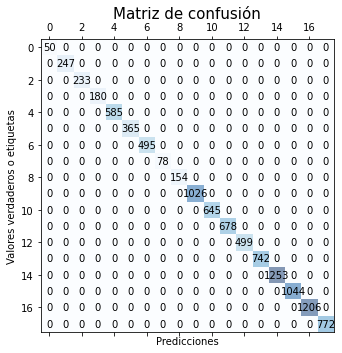

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(mcm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(mcm.shape[0]):
  for j in range(mcm.shape[1]):
      ax.text(x=j, y=i, s=mcm[i, j], va='center', ha='center')

plt.title("Matriz de confusión",fontsize=15)
#plt.title('f model: T= %d' % (t))
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos o etiquetas')

plt.tight_layout()
plt.show()

**Calculamos la métrica F1**

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Precision: %.7f' % precision_score(y_true=labels, y_pred=predictions, average='macro'))
print('Recall: %.7f' % recall_score(y_true=labels, y_pred=predictions, average='macro'))
print('F1: %.7f' % f1_score(y_true=labels, y_pred=predictions, average='macro'))

Precision: 1.0000000
Recall: 1.0000000
F1: 1.0000000
